In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import glob
from natsort import natsorted

# Etude LR

In [2]:
loss_dat = natsorted(glob.glob('./lr/*/*.dat'))

In [3]:
loss_dat

['./lr/lr0/output.dat',
 './lr/lr1/output.dat',
 './lr/lr2/output.dat',
 './lr/lr3/output.dat',
 './lr/lr4/output.dat',
 './lr/lr5/output.dat',
 './lr/lr6/output.dat']

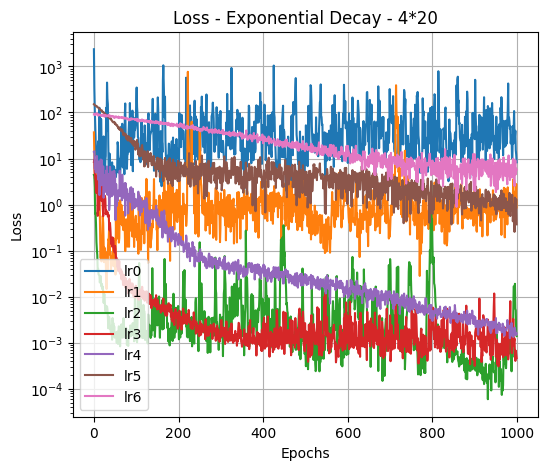

In [4]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
ax.set_yscale('log')
plt.title("Loss - Exponential Decay - 4*20")
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
for i in range(len(loss_dat)):    
    loss = np.loadtxt(loss_dat[i],unpack = True)

    # Plot
    ax.plot(loss[0],loss[1])
    ax.legend(['lr0','lr1','lr2','lr3','lr4','lr5','lr6'])

    # Labels
    
    
    # Save
    #plt.savefig(f'q_{i}.png')
    #plt.cla()

In [14]:
time_dat= np.loadtxt('./lr/lr.txt',unpack=True)

In [6]:
time_dat[1]

array([93.8175, 92.9418, 88.2566, 89.0212, 87.4527, 90.708 , 93.1479])

(80.0, 100.0)

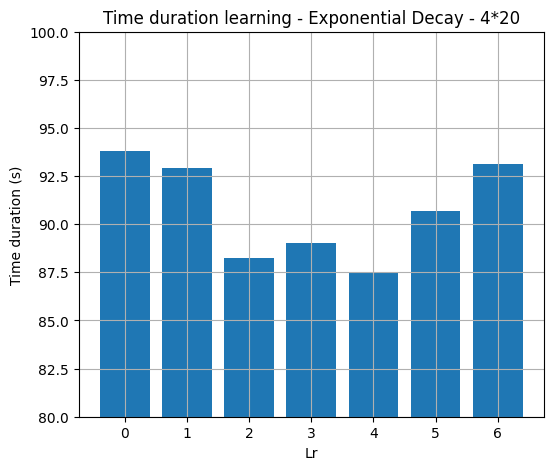

In [7]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()

ax.bar(time_dat[0],time_dat[1])

plt.title("Time duration learning - Exponential Decay - 4*20")
ax.set_xlabel('Lr')
ax.set_ylabel('Time duration (s)')
ax.set_ylim(80, 100)

In [8]:
def Kflowinit(X):
    Y =   np.exp(-X*X)
    return Y

In [9]:
Nx = 1000
x1 = -20.0
x2 = 20
X  = np.linspace(x1,x2,num=Nx, dtype=np.float32)
Input = X.reshape(Nx,-1)
Init = Kflowinit(X)
Init = Init.reshape(Nx,-1)    

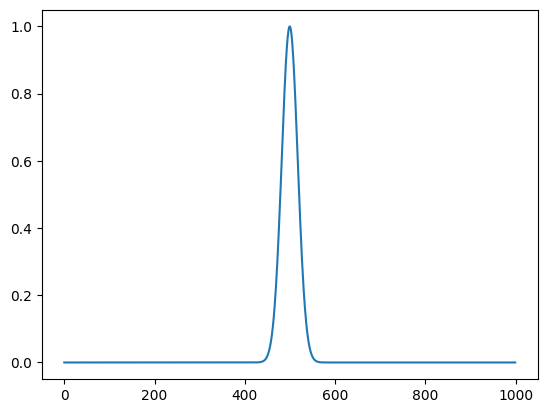

In [10]:
plt.plot(Init)

In [11]:
x_dat = natsorted(glob.glob('./lr/*/X'))
u_dat = natsorted(glob.glob('./lr/*/U'))
v_dat = natsorted(glob.glob('./lr/*/V'))

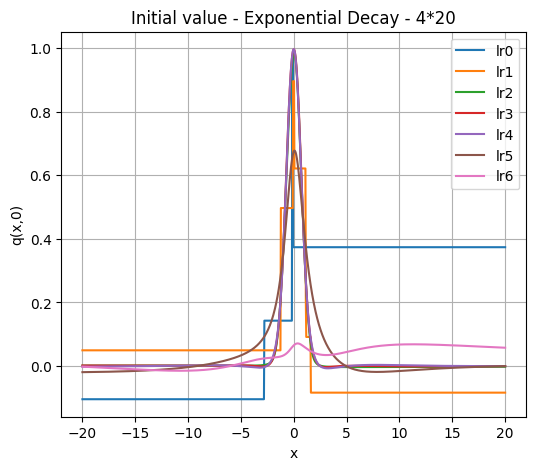

In [12]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
plt.title("Initial value - Exponential Decay - 4*20")
ax.set_xlabel('x')
ax.set_ylabel('q(x,0)')
for i in range(len(x_dat)):    
    u = np.load(u_dat[i],allow_pickle=True)
    v = np.load(v_dat[i],allow_pickle=True)
    x = np.load(x_dat[i],allow_pickle=True)
    
    # Plot
    ax.plot(x,v)
    ax.legend(['lr0','lr1','lr2','lr3','lr4','lr5','lr6'])

    # Labels
    
    
    # Save
    #plt.savefig(f'q_{i}.png')
    #plt.cla()

In [13]:
for i in range(len(u_dat)):
    u = np.load(u_dat[i],allow_pickle=True)
    u = np.vstack(u)
    err_u = u-Init
    err_norm_u = np.linalg.norm(err_u,ord=2) # 'fro' : Frobenius, 2 : ordre 2
    print()
    v = np.load(v_dat[i],allow_pickle=True)
    v = np.vstack(v)
    err_v = v-Init
    err_norm_v = np.linalg.norm(err_v,ord=2) # 'fro' : Frobenius, 2 : ordre 2
    print(err_norm_u,err_norm_v)



11.952707 9.075197

3.010246 2.9164567

0.05548932 0.1296358

0.044726443 0.05728534

0.092790104 0.09665518

2.1604278 2.0768638

5.4207172 5.314669


In [16]:
erreur= np.loadtxt('./lr/lr.txt',unpack=True,usecols=[2,3])

In [17]:
erreur[1]

array([9.075197  , 2.9164567 , 0.1296358 , 0.05728534, 0.09665518,
       2.0768638 , 5.314669  ])

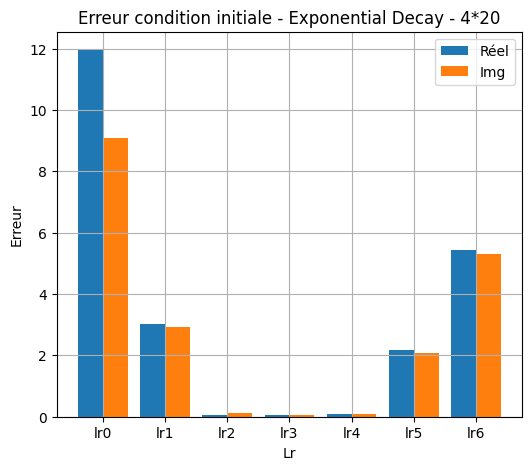

In [19]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
X=['lr0','lr1','lr2','lr3','lr4','lr5','lr6']
X_axis = np.arange(len(X)) 

ax.bar(X_axis-0.2,erreur[0],0.4,label = 'Réel')
ax.bar(X_axis+0.2,erreur[1],0.4,label = 'Img')

plt.xticks(X_axis, X) 
plt.title("Erreur condition initiale - Exponential Decay - 4*20")
ax.set_xlabel("Lr")
ax.set_ylabel('Erreur')
ax.legend()

# Etude activation functions

In [3]:
loss_dat = natsorted(glob.glob('./activation_function/*/*.dat'))

In [4]:
loss_dat

['./activation_function/relu/output.dat',
 './activation_function/sigmoid/output.dat',
 './activation_function/softplus/output.dat',
 './activation_function/tanh/output.dat']

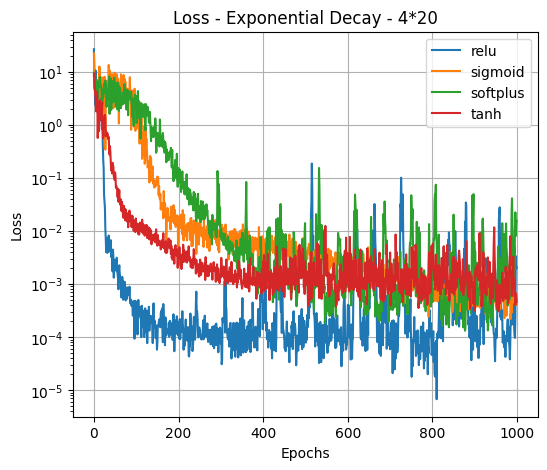

In [5]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
ax.set_yscale('log')
plt.title("Loss - Exponential Decay - 4*20")
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
for i in range(len(loss_dat)):    
    loss = np.loadtxt(loss_dat[i],unpack = True)

    # Plot
    ax.plot(loss[0],loss[1])
    ax.legend(['relu','sigmoid','softplus','tanh'])

    # Labels
    
    
    # Save
    #plt.savefig(f'q_{i}.png')
    #plt.cla()

In [6]:
time_dat= np.loadtxt('./activation_function/activation.txt',unpack=True,usecols=1)

In [7]:
time_dat

array([89.0212, 86.8383, 79.2938, 99.0356])

(75.0, 100.0)

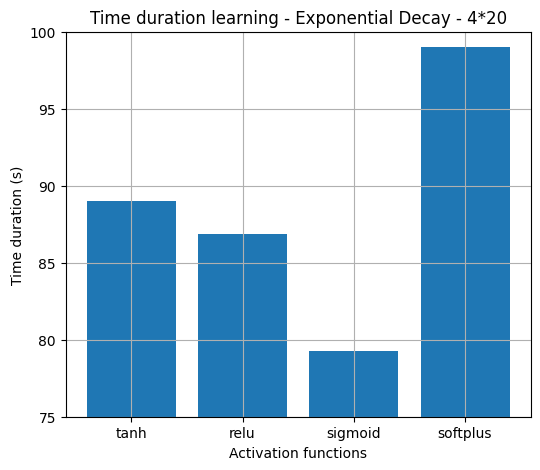

In [9]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()

ax.bar(['tanh','relu','sigmoid','softplus'],time_dat)

plt.title("Time duration learning - Exponential Decay - 4*20")
ax.set_xlabel('Activation functions')
ax.set_ylabel('Time duration (s)')
ax.set_ylim(75, 100)

In [153]:
def Kflowinit(X):
    Y =   np.exp(-X*X)
    return Y

In [154]:
Nx = 1000
x1 = -20.0
x2 = 20
X  = np.linspace(x1,x2,num=Nx, dtype=np.float32)
Input = X.reshape(Nx,-1)
Init = Kflowinit(X)
Init = Init.reshape(Nx,-1)    

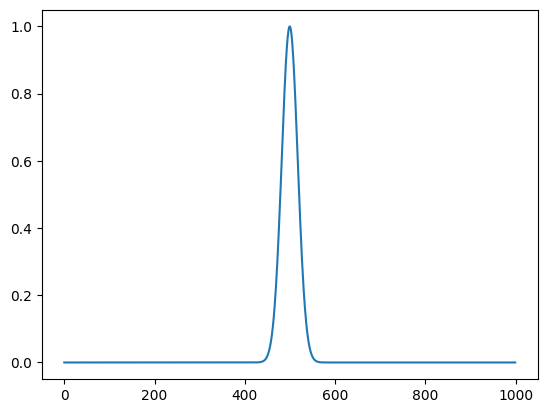

In [155]:
plt.plot(Init)

In [113]:
x_dat = natsorted(glob.glob('./activation_function/*/X'))
u_dat = natsorted(glob.glob('./activation_function/*/U'))
v_dat = natsorted(glob.glob('./activation_function/*/V'))

In [114]:
u_dat

['./activation_function/relu/U',
 './activation_function/sigmoid/U',
 './activation_function/softplus/U',
 './activation_function/tanh/U']

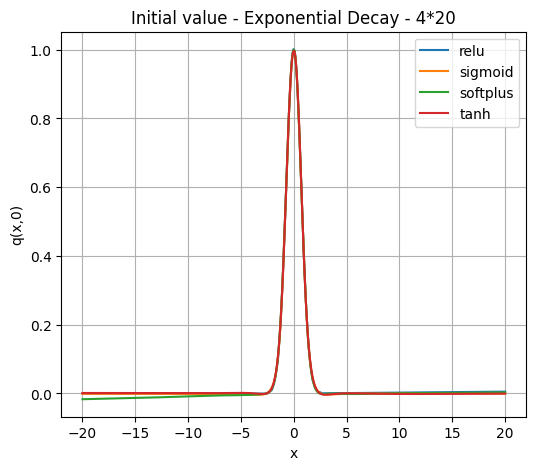

In [115]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
plt.title("Initial value - Exponential Decay - 4*20")
ax.set_xlabel('x')
ax.set_ylabel('q(x,0)')
for i in range(len(x_dat)):    
    u = np.load(u_dat[i],allow_pickle=True)
    v = np.load(v_dat[i],allow_pickle=True)
    x = np.load(x_dat[i],allow_pickle=True)
    
    # Plot
    ax.plot(x,v)
    ax.legend(['relu','sigmoid','softplus','tanh'])

    # Labels
    
    
    # Save
    #plt.savefig(f'q_{i}.png')
    #plt.cla()

In [116]:
for i in range(len(u_dat)):
    u = np.load(u_dat[i],allow_pickle=True)
    u = np.vstack(u)
    err_u = u-Init
    err_norm_u = np.linalg.norm(err_u,ord=2) # 'fro' : Frobenius, 2 : ordre 2
    print()
    v = np.load(v_dat[i],allow_pickle=True)
    v = np.vstack(v)
    err_v = v-Init
    err_norm_v = np.linalg.norm(err_v,ord=2) # 'fro' : Frobenius, 2 : ordre 2
    print(u_dat[i],err_norm_u,err_norm_v)


./activation_function/relu/U 0.040824592 0.06982185

./activation_function/sigmoid/U 0.047076665 0.04961445

./activation_function/softplus/U 0.2313616 0.22857586

./activation_function/tanh/U 0.044726443 0.05728534


In [178]:
erreur= np.loadtxt('./activation_function/activation.txt',unpack=True,usecols=[2,3])

In [182]:
erreur[1]

array([0.05728534, 0.06982185, 0.04961445, 0.22857586])

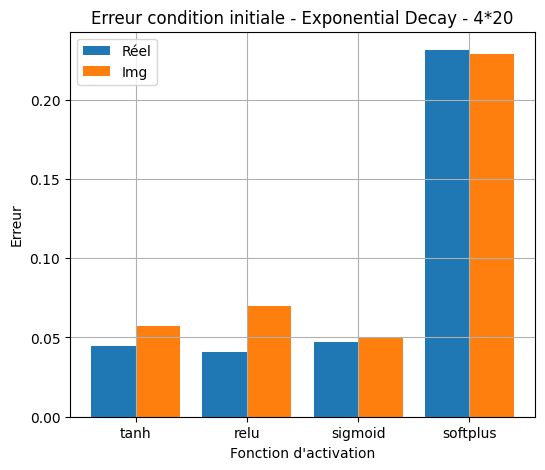

In [201]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
X=['tanh','relu','sigmoid','softplus']
X_axis = np.arange(len(X)) 

ax.bar(X_axis-0.2,erreur[0],0.4,label = 'Réel')
ax.bar(X_axis+0.2,erreur[1],0.4,label = 'Img')

plt.xticks(X_axis, X) 
plt.title("Erreur condition initiale - Exponential Decay - 4*20")
ax.set_xlabel("Fonction d'activation")
ax.set_ylabel('Erreur')
ax.legend()

# Etude architecture nn

In [33]:
loss_dat = natsorted(glob.glob('./nn_architecture/*/*.dat'))

In [34]:
loss_dat

['./nn_architecture/nn1/output.dat',
 './nn_architecture/nn2/output.dat',
 './nn_architecture/nn3/output.dat',
 './nn_architecture/nn4/output.dat',
 './nn_architecture/nn5/output.dat']

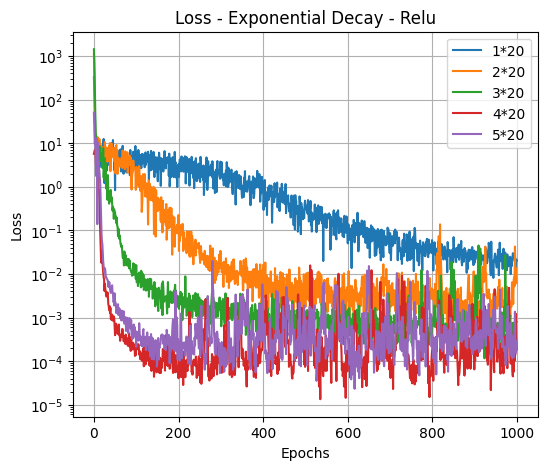

In [35]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
ax.set_yscale('log')
plt.title("Loss - Exponential Decay - Relu")
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
for i in range(len(loss_dat)):    
    loss = np.loadtxt(loss_dat[i],unpack = True)

    # Plot
    ax.plot(loss[0],loss[1])
    ax.legend(['1*20','2*20','3*20','4*20','5*20'])

    # Labels
    
    
    # Save
    #plt.savefig(f'q_{i}.png')
    #plt.cla()

In [41]:
time_dat= np.loadtxt('./nn_architecture/nn_architecture.txt',unpack=True,usecols=1)

In [42]:
time_dat

array([ 67.809 ,  93.8819,  90.4101,  89.962 , 100.2031])

(65.0, 105.0)

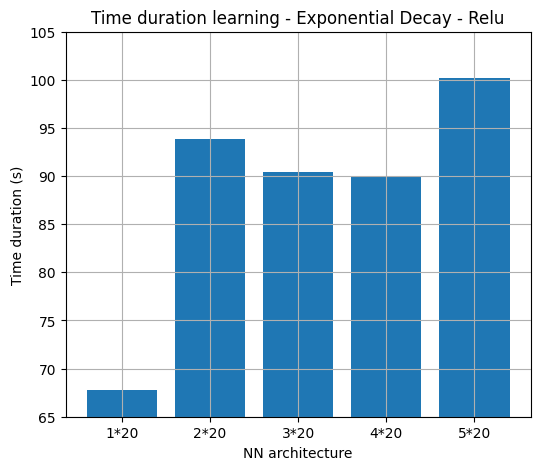

In [46]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()

ax.bar(['1*20','2*20','3*20','4*20','5*20'],time_dat)

plt.title("Time duration learning - Exponential Decay - Relu")
ax.set_xlabel('NN architecture')
ax.set_ylabel('Time duration (s)')
ax.set_ylim(65, 105)

In [47]:
def Kflowinit(X):
    Y =   np.exp(-X*X)
    return Y

In [48]:
Nx = 1000
x1 = -20.0
x2 = 20
X  = np.linspace(x1,x2,num=Nx, dtype=np.float32)
Input = X.reshape(Nx,-1)
Init = Kflowinit(X)
Init = Init.reshape(Nx,-1)    

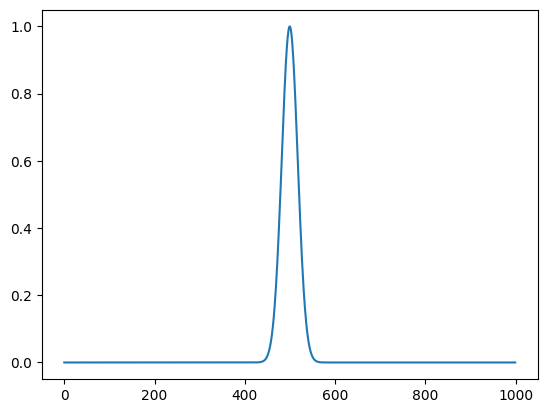

In [49]:
plt.plot(Init)

In [53]:
x_dat = natsorted(glob.glob('./nn_architecture/*/X'))
u_dat = natsorted(glob.glob('./nn_architecture/*/U'))
v_dat = natsorted(glob.glob('./nn_architecture/*/V'))

In [54]:
u_dat

['./nn_architecture/nn1/U',
 './nn_architecture/nn2/U',
 './nn_architecture/nn3/U',
 './nn_architecture/nn4/U',
 './nn_architecture/nn5/U']

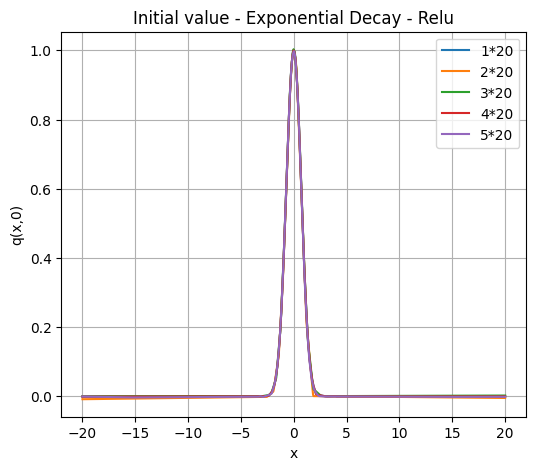

In [56]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
plt.title("Initial value - Exponential Decay - Relu")
ax.set_xlabel('x')
ax.set_ylabel('q(x,0)')
for i in range(len(x_dat)):    
    u = np.load(u_dat[i],allow_pickle=True)
    v = np.load(v_dat[i],allow_pickle=True)
    x = np.load(x_dat[i],allow_pickle=True)
    
    # Plot
    ax.plot(x,v)
    ax.legend(['1*20','2*20','3*20','4*20','5*20'])

    # Labels
    
    
    # Save
    #plt.savefig(f'q_{i}.png')
    #plt.cla()

In [57]:
for i in range(len(u_dat)):
    u = np.load(u_dat[i],allow_pickle=True)
    u = np.vstack(u)
    err_u = u-Init
    err_norm_u = np.linalg.norm(err_u,ord=2) # 'fro' : Frobenius, 2 : ordre 2
    print()
    v = np.load(v_dat[i],allow_pickle=True)
    v = np.vstack(v)
    err_v = v-Init
    err_norm_v = np.linalg.norm(err_v,ord=2) # 'fro' : Frobenius, 2 : ordre 2
    print(err_norm_u,err_norm_v)


0.044036895 0.022489395

0.16706474 0.15648656

0.06865793 0.05773737

0.044036895 0.022489395

0.06653394 0.067081936


In [58]:
erreur= np.loadtxt('./nn_architecture/nn_architecture.txt',unpack=True,usecols=[2,3])

In [59]:
erreur[1]

array([0.02248939, 0.15648656, 0.05773737, 0.02248939, 0.06708194])

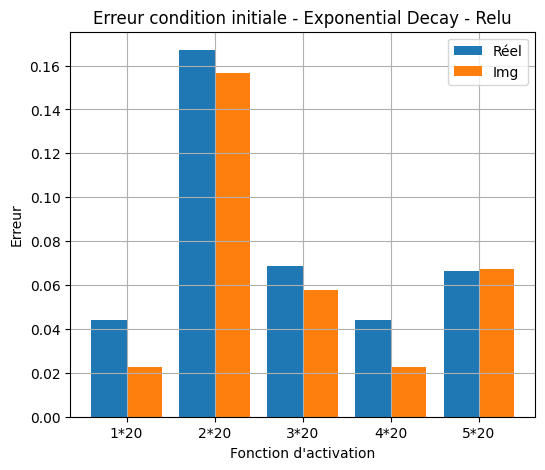

In [62]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
X=['1*20','2*20','3*20','4*20','5*20']
X_axis = np.arange(len(X)) 

ax.bar(X_axis-0.2,erreur[0],0.4,label = 'Réel')
ax.bar(X_axis+0.2,erreur[1],0.4,label = 'Img')

plt.xticks(X_axis, X) 
plt.title("Erreur condition initiale - Exponential Decay - Relu")
ax.set_xlabel("Fonction d'activation")
ax.set_ylabel('Erreur')
ax.legend()

# Etude architecture nn1

In [105]:
loss_dat = natsorted(glob.glob('./nn_architecture_1/*/*.dat'))

In [106]:
loss_dat

['./nn_architecture_1/nn4-5/output.dat',
 './nn_architecture_1/nn4-10/output.dat',
 './nn_architecture_1/nn4-20/output.dat',
 './nn_architecture_1/nn4-30/output.dat',
 './nn_architecture_1/nn4-60/output.dat']

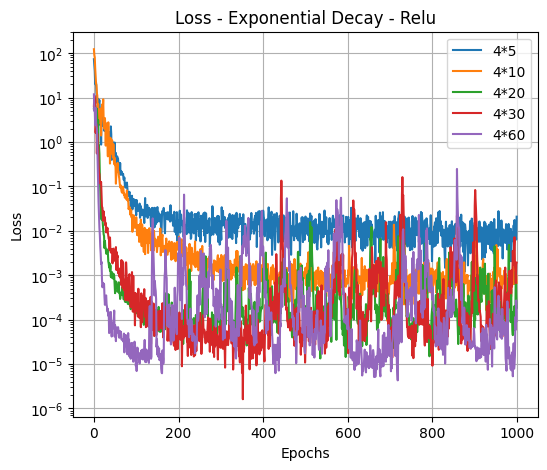

In [107]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
ax.set_yscale('log')
plt.title("Loss - Exponential Decay - Relu")
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
for i in range(len(loss_dat)):    
    loss = np.loadtxt(loss_dat[i],unpack = True)

    # Plot
    ax.plot(loss[0],loss[1])
    ax.legend(['4*5','4*10','4*20','4*30','4*60'])

    # Labels
    
    
    # Save
    #plt.savefig(f'q_{i}.png')
    #plt.cla()

In [69]:
time_dat= np.loadtxt('./nn_architecture_1/nn_architecture_1.txt',unpack=True,usecols=1)

In [70]:
time_dat

array([91.0042, 99.8653, 89.962 , 81.1075, 88.1002])

(65.0, 105.0)

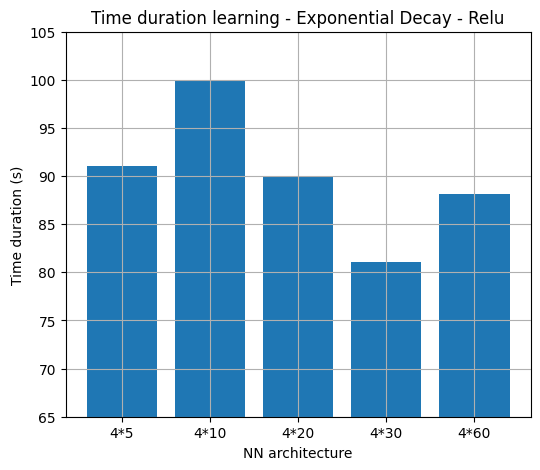

In [71]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()

ax.bar(['4*5','4*10','4*20','4*30','4*60'],time_dat)

plt.title("Time duration learning - Exponential Decay - Relu")
ax.set_xlabel('NN architecture')
ax.set_ylabel('Time duration (s)')
ax.set_ylim(65, 105)

In [72]:
def Kflowinit(X):
    Y =   np.exp(-X*X)
    return Y

In [73]:
Nx = 1000
x1 = -20.0
x2 = 20
X  = np.linspace(x1,x2,num=Nx, dtype=np.float32)
Input = X.reshape(Nx,-1)
Init = Kflowinit(X)
Init = Init.reshape(Nx,-1)    

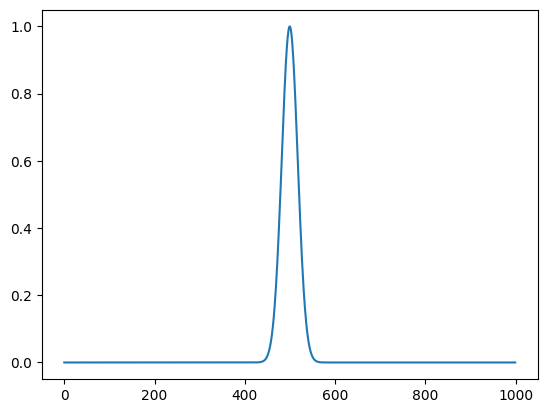

In [74]:
plt.plot(Init)

In [75]:
x_dat = natsorted(glob.glob('./nn_architecture_1/*/X'))
u_dat = natsorted(glob.glob('./nn_architecture_1/*/U'))
v_dat = natsorted(glob.glob('./nn_architecture_1/*/V'))

In [76]:
u_dat

['./nn_architecture_1/nn4-5/U',
 './nn_architecture_1/nn4-10/U',
 './nn_architecture_1/nn4-20/U',
 './nn_architecture_1/nn4-30/U',
 './nn_architecture_1/nn4-60/U']

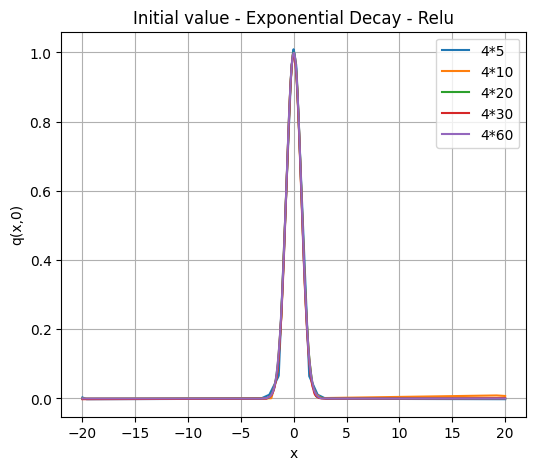

In [77]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
plt.title("Initial value - Exponential Decay - Relu")
ax.set_xlabel('x')
ax.set_ylabel('q(x,0)')
for i in range(len(x_dat)):    
    u = np.load(u_dat[i],allow_pickle=True)
    v = np.load(v_dat[i],allow_pickle=True)
    x = np.load(x_dat[i],allow_pickle=True)
    
    # Plot
    ax.plot(x,v)
    ax.legend(['4*5','4*10','4*20','4*30','4*60'])

    # Labels
    
    
    # Save
    #plt.savefig(f'q_{i}.png')
    #plt.cla()

In [78]:
for i in range(len(u_dat)):
    u = np.load(u_dat[i],allow_pickle=True)
    u = np.vstack(u)
    err_u = u-Init
    err_norm_u = np.linalg.norm(err_u,ord=2) # 'fro' : Frobenius, 2 : ordre 2
    print()
    v = np.load(v_dat[i],allow_pickle=True)
    v = np.vstack(v)
    err_v = v-Init
    err_norm_v = np.linalg.norm(err_v,ord=2) # 'fro' : Frobenius, 2 : ordre 2
    print(err_norm_u,err_norm_v)


0.20110573 0.2172921

0.09340099 0.12721369

0.044036895 0.022489395

0.09824415 0.09883198

0.017827213 0.017192783


In [79]:
erreur= np.loadtxt('./nn_architecture_1/nn_architecture_1.txt',unpack=True,usecols=[2,3])

In [80]:
erreur[1]

array([0.2172921 , 0.12721369, 0.02248939, 0.09883198, 0.01719278])

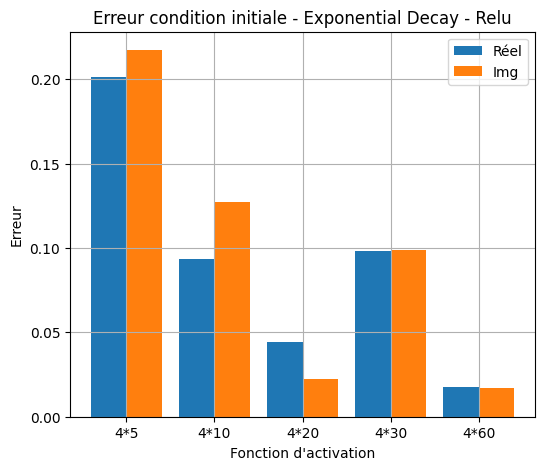

In [81]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
X=['4*5','4*10','4*20','4*30','4*60']
X_axis = np.arange(len(X)) 

ax.bar(X_axis-0.2,erreur[0],0.4,label = 'Réel')
ax.bar(X_axis+0.2,erreur[1],0.4,label = 'Img')

plt.xticks(X_axis, X) 
plt.title("Erreur condition initiale - Exponential Decay - Relu")
ax.set_xlabel("Fonction d'activation")
ax.set_ylabel('Erreur')
ax.legend()

# Etude Sampling

In [26]:
loss_dat = natsorted(glob.glob('./sampling/*/*.dat'))

In [27]:
loss_dat

['./sampling/grid/output.dat',
 './sampling/lhs/output.dat',
 './sampling/random_uniform/output.dat',
 './sampling/sobol/output.dat',
 './sampling/triangular/output.dat']

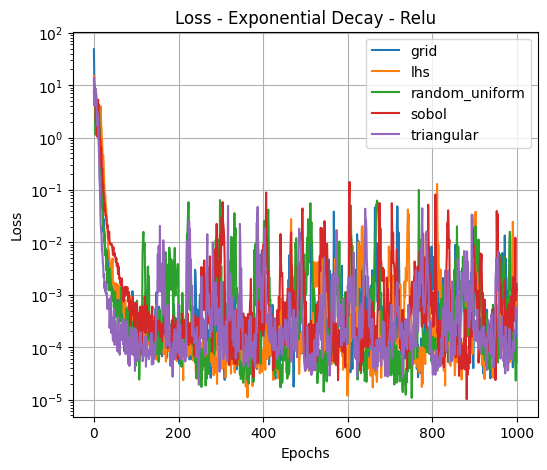

In [28]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
ax.set_yscale('log')
plt.title("Loss - Exponential Decay - Relu")
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
for i in range(len(loss_dat)):    
    loss = np.loadtxt(loss_dat[i],unpack = True)

    # Plot
    ax.plot(loss[0],loss[1])
    ax.legend(['grid','lhs','random_uniform','sobol','triangular'])

    # Labels
    
    
    # Save
    #plt.savefig(f'q_{i}.png')
    #plt.cla()

In [33]:
time_dat= np.loadtxt('./sampling/sampling.txt',unpack=True,usecols=[1,2])

In [34]:
time_dat

array([[85.8265, 87.2771, 95.1968, 89.153 , 96.8865],
       [60.513 , 59.3393, 65.0677, 65.9872, 87.4444]])

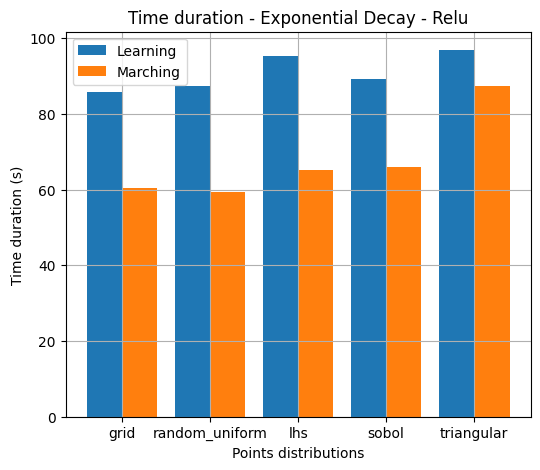

In [36]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
X=['grid','random_uniform','lhs','sobol','triangular']
X_axis = np.arange(len(X)) 

ax.bar(X_axis-0.2,time_dat[0],0.4,label = 'Learning')
ax.bar(X_axis+0.2,time_dat[1],0.4,label = 'Marching')

plt.xticks(X_axis, X) 
plt.title("Time duration - Exponential Decay - Relu")
ax.set_xlabel("Points distributions")
ax.set_ylabel('Time duration (s)')
ax.legend()

In [37]:
def Kflowinit(X):
    Y =   np.exp(-X*X)
    return Y

In [38]:
Nx = 1000
x1 = -20.0
x2 = 20
X  = np.linspace(x1,x2,num=Nx, dtype=np.float32)
Input = X.reshape(Nx,-1)
Init = Kflowinit(X)
Init = Init.reshape(Nx,-1)    

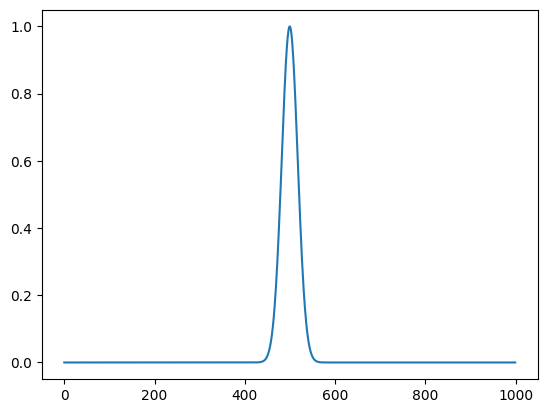

In [39]:
plt.plot(Init)

In [40]:
x_dat = natsorted(glob.glob('./sampling/*/X'))
u_dat = natsorted(glob.glob('./sampling/*/U'))
v_dat = natsorted(glob.glob('./sampling/*/V'))

In [41]:
u_dat

['./sampling/grid/U',
 './sampling/lhs/U',
 './sampling/random_uniform/U',
 './sampling/sobol/U',
 './sampling/triangular/U']

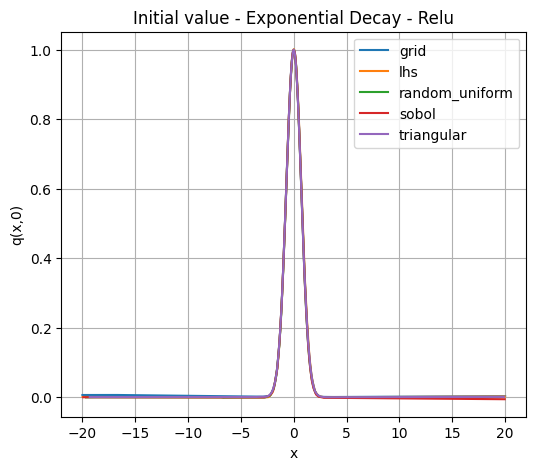

In [42]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
plt.title("Initial value - Exponential Decay - Relu")
ax.set_xlabel('x')
ax.set_ylabel('q(x,0)')
for i in range(len(x_dat)):    
    u = np.load(u_dat[i],allow_pickle=True)
    v = np.load(v_dat[i],allow_pickle=True)
    x = np.load(x_dat[i],allow_pickle=True)
    
    # Plot
    ax.plot(x,v)
    ax.legend(['grid','lhs','random_uniform','sobol','triangular'])

    # Labels
    
    
    # Save
    #plt.savefig(f'q_{i}.png')
    #plt.cla()

In [43]:
for i in range(len(u_dat)):
    u = np.load(u_dat[i],allow_pickle=True)
    u = np.vstack(u)
    squared_diff_u = np.square(u - Init)
    mse_loss_u = np.mean(squared_diff_u)
    print()
    v = np.load(v_dat[i],allow_pickle=True)
    v = np.vstack(v)
    squared_diff_v = np.square(v - Init)
    mse_loss_v = np.mean(squared_diff_v)
    print(u_dat[i],mse_loss_u, mse_loss_v)


./sampling/grid/U 1.1246907e-05 1.4196786e-05

./sampling/lhs/U 8.08921e-06 8.427278e-06

./sampling/random_uniform/U 0.00014808387 0.00014650822

./sampling/sobol/U 5.171126e-06 7.988806e-06

./sampling/triangular/U 0.014870456 0.014896362


In [47]:
erreur= np.loadtxt('./sampling/sampling.txt',unpack=True,usecols=[3,4])

In [48]:
erreur[1]

array([1.4196786e-05, 1.4650822e-04, 8.4272780e-06, 7.9888060e-06,
       1.4896362e-02])

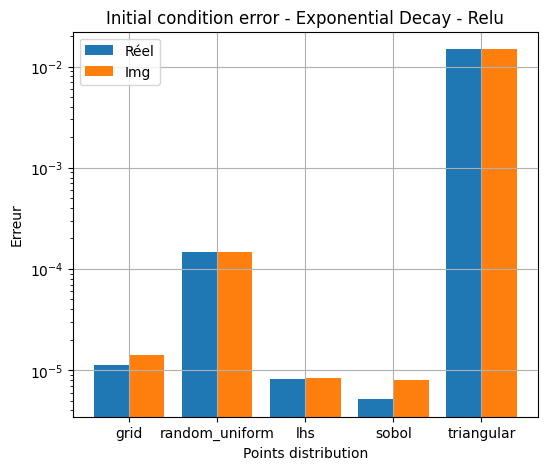

In [50]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
X=['grid','random_uniform','lhs','sobol','triangular']
X_axis = np.arange(len(X)) 
ax.set_yscale('log')

ax.bar(X_axis-0.2,erreur[0],0.4,label = 'Réel')
ax.bar(X_axis+0.2,erreur[1],0.4,label = 'Img')

plt.xticks(X_axis, X) 
plt.title("Initial condition error - Exponential Decay - Relu")
ax.set_xlabel("Points distribution")
ax.set_ylabel('Erreur')
ax.legend()

# Etude Loss Functions

In [2]:
loss_dat = natsorted(glob.glob('./loss_function/*/*.dat'))

In [3]:
loss_dat

['./loss_function/logcosh/output.dat',
 './loss_function/mae/output.dat',
 './loss_function/mse/output.dat',
 './loss_function/msle/output.dat',
 './loss_function/rmse/output.dat']

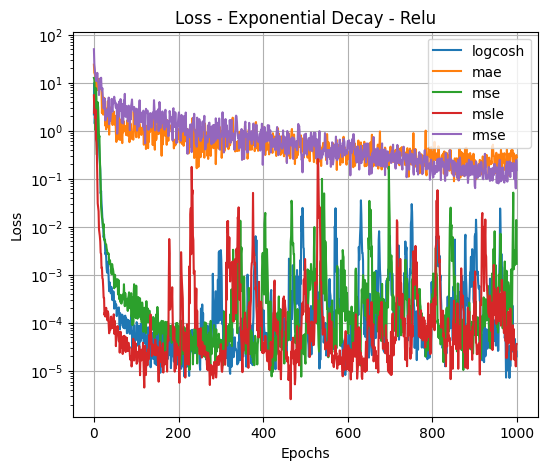

In [4]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
ax.set_yscale('log')
plt.title("Loss - Exponential Decay - Relu")
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
for i in range(len(loss_dat)):    
    loss = np.loadtxt(loss_dat[i],unpack = True)

    # Plot
    ax.plot(loss[0],loss[1])
    ax.legend(['logcosh','mae','mse','msle','rmse'])

    # Labels
    
    
    # Save
    #plt.savefig(f'q_{i}.png')
    #plt.cla()

In [5]:
time_dat= np.loadtxt('./loss_function/loss_function.txt',unpack=True,usecols=1)

In [6]:
time_dat

array([ 81.1075,  97.9507, 112.6097, 100.605 , 109.4903])

(65.0, 120.0)

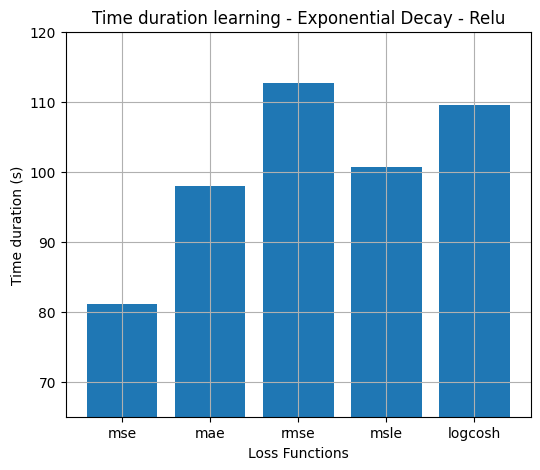

In [7]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()

ax.bar(['mse','mae','rmse','msle','logcosh'],time_dat)

plt.title("Time duration learning - Exponential Decay - Relu")
ax.set_xlabel('Loss Functions')
ax.set_ylabel('Time duration (s)')
ax.set_ylim(65, 120)

In [8]:
def Kflowinit(X):
    Y =   np.exp(-X*X)
    return Y

In [9]:
Nx = 1000
x1 = -20.0
x2 = 20
X  = np.linspace(x1,x2,num=Nx, dtype=np.float32)
Input = X.reshape(Nx,-1)
Init = Kflowinit(X)
Init = Init.reshape(Nx,-1)    

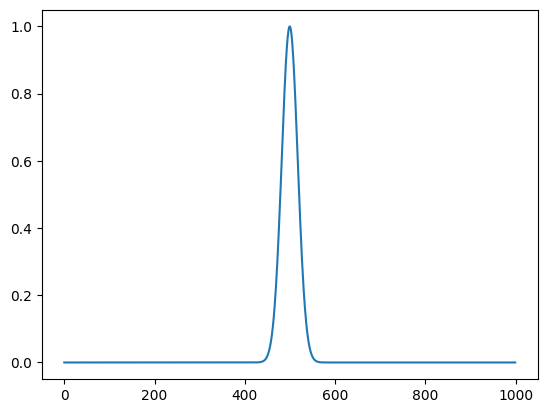

In [10]:
plt.plot(Init)

In [11]:
x_dat = natsorted(glob.glob('./loss_function/*/X'))
u_dat = natsorted(glob.glob('./loss_function/*/U'))
v_dat = natsorted(glob.glob('./loss_function/*/V'))

In [12]:
u_dat

['./loss_function/logcosh/U',
 './loss_function/mae/U',
 './loss_function/mse/U',
 './loss_function/msle/U',
 './loss_function/rmse/U']

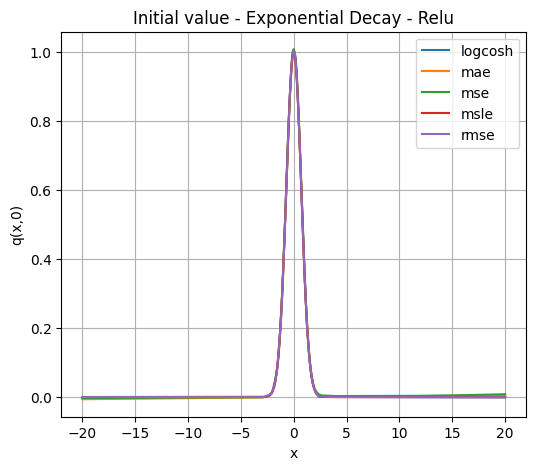

In [13]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
plt.title("Initial value - Exponential Decay - Relu")
ax.set_xlabel('x')
ax.set_ylabel('q(x,0)')
for i in range(len(x_dat)):    
    u = np.load(u_dat[i],allow_pickle=True)
    v = np.load(v_dat[i],allow_pickle=True)
    x = np.load(x_dat[i],allow_pickle=True)
    
    # Plot
    ax.plot(x,v)
    ax.legend(['logcosh','mae','mse','msle','rmse'])

    # Labels
    
    
    # Save
    #plt.savefig(f'q_{i}.png')
    #plt.cla()

In [21]:
for i in range(len(u_dat)):
    u = np.load(u_dat[i],allow_pickle=True)
    u = np.vstack(u)
    squared_diff_u = np.square(u - Init)
    mse_loss_u = np.mean(squared_diff_u)
    print()
    v = np.load(v_dat[i],allow_pickle=True)
    v = np.vstack(v)
    squared_diff_v = np.square(v - Init)
    mse_loss_v = np.mean(squared_diff_v)
    print(u_dat[i],mse_loss_u, mse_loss_v)


./loss_function/logcosh/U 1.8310548e-07 7.2171093e-07

./loss_function/mae/U 2.3593743e-06 1.0130635e-05

./loss_function/mse/U 2.5550778e-05 1.6418191e-05

./loss_function/msle/U 1.7696559e-07 1.4390521e-07

./loss_function/rmse/U 8.7048727e-07 9.375435e-07


In [51]:
erreur= np.loadtxt('./loss_function/loss_function.txt',unpack=True,usecols=[2,3])

In [52]:
erreur[1]

array([1.6418191e-05, 2.7404479e-03, 9.6826830e-04, 1.8118819e-14,
       3.5750847e-07])

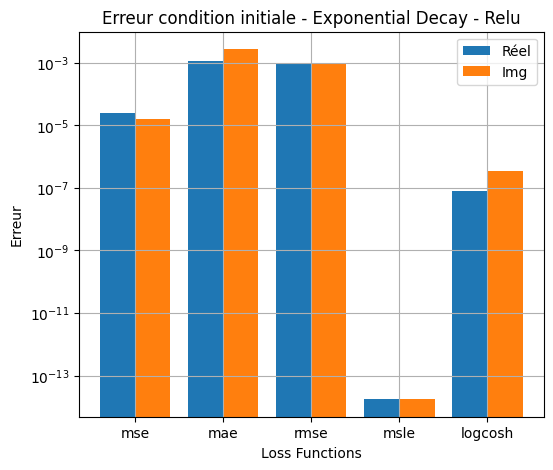

In [53]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
X=['mse','mae','rmse','msle','logcosh']
X_axis = np.arange(len(X)) 
ax.set_yscale('log')

ax.bar(X_axis-0.2,erreur[0],0.4,label = 'Réel')
ax.bar(X_axis+0.2,erreur[1],0.4,label = 'Img')

plt.xticks(X_axis, X) 
plt.title("Erreur condition initiale - Exponential Decay - Relu")
ax.set_xlabel("Loss Functions")
ax.set_ylabel('Erreur')
ax.legend()

# Cost Actions

Identify the main costly actions of the EDNN :
- Formation of the Jacobian matrix J 
- Inverting the linear system JT J
- Automatic differentiation of the network outputs to evaluate the equation operator Nx(u)

In [23]:
time_dat= np.loadtxt('./cost_action/time.txt',unpack=True, usecols=[1,2,3,4])

In [24]:
time_dat

array([[2.0772e+00, 9.8960e-01, 5.7231e+00],
       [1.4000e-01, 3.1000e-03, 5.4810e+00],
       [2.3630e+01, 1.1260e+01, 6.4770e+01],
       [2.4890e+00, 5.5000e-02, 9.7456e+01]])

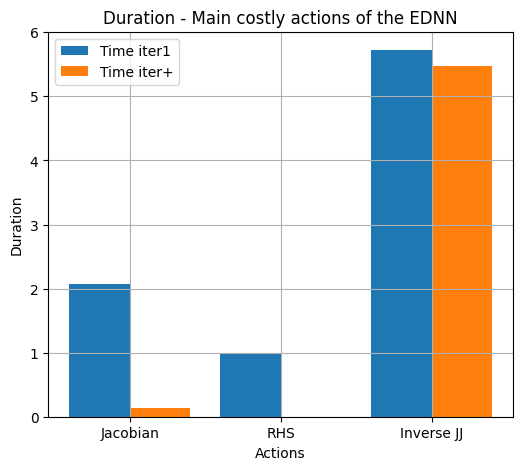

In [25]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
X=['Jacobian','RHS','Inverse JJ']
X_axis = np.arange(len(X)) 

ax.bar(X_axis-0.2,time_dat[0],0.4,label = 'Time iter1')
ax.bar(X_axis+0.2,time_dat[1],0.4,label = 'Time iter+')

plt.xticks(X_axis, X) 
plt.title("Duration - Main costly actions of the EDNN")
ax.set_xlabel("Actions")
ax.set_ylabel('Duration')
ax.legend()

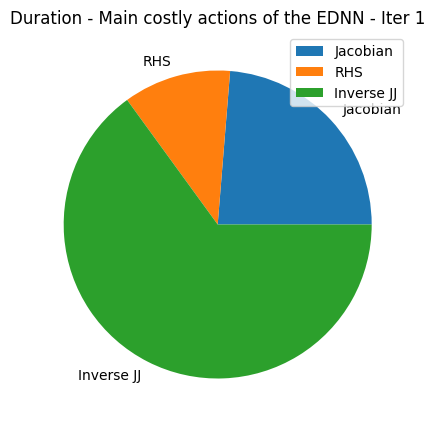

In [36]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
X=['Jacobian','RHS','Inverse JJ']

ax.pie(time_dat[2],labels=X)

plt.title("Duration - Main costly actions of the EDNN - Iter 1")
ax.legend()

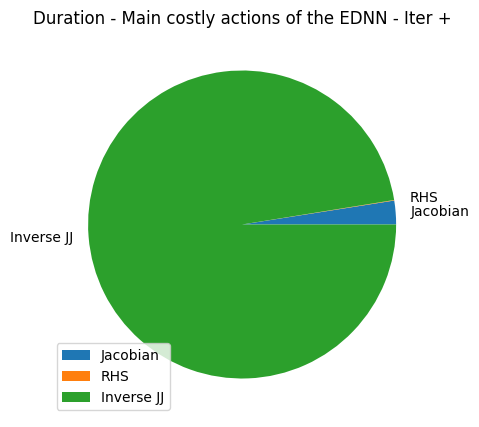

In [38]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
X=['Jacobian','RHS','Inverse JJ']

ax.pie(time_dat[3],labels=X)

plt.title("Duration - Main costly actions of the EDNN - Iter +")
ax.legend()